# Proyek Akhir: Klasifikasi Gambar
# Irfan Muhammad Ghani
### https://www.dicoding.com/users/irfanmghani

In [1]:
# cek tensorflow version
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
# download dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-14 11:10:59--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.47MB/s    in 4m 19s  

2021-05-14 11:15:19 (1.19 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [8]:
# ekstrak file

import zipfile
import os
import os.path
from os import path

if path.exists('tmp/rockpaperscissors') == True:
    pass
else:
    local_zip = 'tmp/rockpaperscissors.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('tmp')
    zip_ref.close()

# letak penyimpanan dataset
data_dir = 'tmp/rockpaperscissors'

In [9]:
img_height = 150
img_width = 150
batch_size = 32

class_names = ['paper', 'rock', 'scissors']

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# augmentasi gambar
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.4) # set validation split

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    classes = class_names,
    subset = 'training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    classes = class_names,
    subset = 'validation') # set as validation data

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [30]:
# buat model sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='sigmoid')
])

In [31]:
# compile model, loss CategoricalCrossentropy, optimizer SGD
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.optimizers.SGD(),
              metrics=['accuracy'])

In [35]:
# latih model
import time

epochs = 30

start = time.time()
history = model.fit(
      train_generator,
      steps_per_epoch=25,
      validation_data = validation_generator,
      validation_steps=5,
      epochs = epochs
      )

print("Total time: ", (time.time() - start)/60, "minutes")

Epoch 1/30
25/25 [==============================] - 34s 1s/step - loss: 0.3733 - accuracy: 0.8610 - val_loss: 0.2689 - val_accuracy: 0.9062
Epoch 2/30
25/25 [==============================] - 34s 1s/step - loss: 0.2702 - accuracy: 0.9038 - val_loss: 0.4478 - val_accuracy: 0.8562
Epoch 3/30
25/25 [==============================] - 33s 1s/step - loss: 0.2781 - accuracy: 0.8974 - val_loss: 0.2317 - val_accuracy: 0.9312
Epoch 4/30
25/25 [==============================] - 33s 1s/step - loss: 0.2788 - accuracy: 0.8909 - val_loss: 0.3869 - val_accuracy: 0.8813
Epoch 5/30
25/25 [==============================] - 33s 1s/step - loss: 0.3089 - accuracy: 0.8909 - val_loss: 0.2344 - val_accuracy: 0.9187
Epoch 6/30
25/25 [==============================] - 35s 1s/step - loss: 0.1937 - accuracy: 0.9413 - val_loss: 0.2160 - val_accuracy: 0.9375
Epoch 7/30
25/25 [==============================] - 33s 1s/step - loss: 0.2417 - accuracy: 0.9078 - val_loss: 0.2835 - val_accuracy: 0.9000
Epoch 8/30
25/25 [==

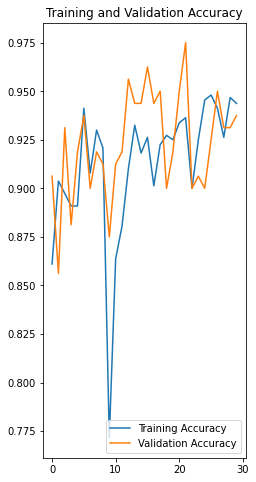

In [36]:
# plot akurasi pelatihan dan validasi
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.show()

Saving IMG20210514203853.jpg to IMG20210514203853 (1).jpg
scissors


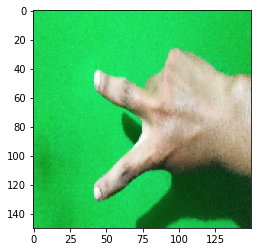

In [37]:
# buat prediksi
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(img_height,img_width))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  score = tf.nn.softmax(classes[0]) 
  
  print(class_names[np.argmax(score)])